# Анализ результатов АБ-теста
### Тест, 7 вопросов

## 1. В данном задании вам нужно будет

- проанализировать АБ тест, проведенный на реальных пользователях Яндекса
- подтвердить или опровергнуть наличие изменений в пользовательском поведении между контрольной (control) и тестовой (exp) группами
- определить характер этих изменений и практическую значимость вводимого изменения
- понять, какая из пользовательских групп более всего проигрывает / выигрывает от тестируемого изменения (локализовать изменение)
### Описание данных:   


- `userID`: уникальный идентификатор пользователя
- `browser`: браузер, который использовал userID
- `slot`: в каком статусе пользователь участвовал в исследовании (exp = видел измененную страницу, control = видел неизменную страницу)
- `n_clicks`: количество кликов, которые пользоваль совершил за n_queries
- `n_queries`: количество запросов, который совершил userID, пользуясь браузером browser
- `n_nonclk_queries`: количество запросов пользователя, в которых им не было совершено ни одного клика

Обращаем ваше внимание, что не все люди используют только один браузер, поэтому в столбце `userID` есть повторяющиеся идентификаторы. В предлагаемых данных уникальным является сочетание `userID` и `browser`.

Файл данных:   
<a href="https://d3c33hcgiwev3.cloudfront.net/_e5da3bbe4a9b1bdbfe17c402d05cbe63_ab_browser_test.csv?Expires=1512000000&Signature=XS7Tyd7fhp8-ThEstocRUNQz6hazP7CQwpj8m73cZ-yOibpXheVDssED9~8dqelDM~9NAhx9IWUsiJYU1Aog7xE4DGIEY3jN-BjhUdy9LDe5ZSI4q4YB2bIJOOdvi5S4ie1xLqnyGFcQbL2hOkal7C4SqOB5lTG61hD31U0h5Iw_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A">**ab_browser_test.csv**</a>

Основная метрика, на которой мы сосредоточимся в этой работе, — это количество пользовательских кликов на `web`-странице в зависимости от тестируемого изменения этой страницы.

Посчитайте, насколько в группе exp больше пользовательских кликов по сравнению с группой control в процентах от числа кликов в контрольной группе.

Полученный процент округлите до третьего знака после точки.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import scipy
from statsmodels.stats.weightstats import *

In [56]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv('data/ab_browser_test.csv')

In [5]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [6]:
data.shape

(566134, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566134 entries, 0 to 566133
Data columns (total 6 columns):
userID              566134 non-null int64
browser             566134 non-null object
slot                566134 non-null object
n_clicks            566134 non-null int64
n_queries           566134 non-null int64
n_nonclk_queries    566134 non-null int64
dtypes: int64(4), object(2)
memory usage: 25.9+ MB


In [8]:
data.describe()

,userID,n_clicks,n_queries,n_nonclk_queries
count,566134.000000,566134.000000,566134.000000,566134.000000
mean,301377.214027,11.431658,10.720524,4.703987
std,175526.333101,20.251494,16.262827,8.109958
min,1.000000,0.000000,1.000000,0.000000
25%,148627.250000,1.000000,2.000000,1.000000
50%,299362.500000,4.000000,5.000000,2.000000
75%,455698.750000,13.000000,13.000000,6.000000
max,603137.000000,863.000000,665.000000,581.000000


In [9]:
data['slot'].value_counts()

control    284554
exp        281580
Name: slot, dtype: int64

Посчитайте, насколько в группе exp больше пользовательских кликов по сравнению с группой control в процентах от числа кликов в контрольной группе.   
Полученный процент округлите до третьего знака после точки.

Подготовим данные для анализа:

In [10]:
n_clicks_exp = data['n_clicks'][data['slot'] == 'exp'].values
n_clicks_control = data['n_clicks'][data['slot'] == 'control'].values

In [11]:
round(float(n_clicks_exp.sum() - n_clicks_control.sum()) / n_clicks_control.sum() * 100, 3)

1.614

## 2. Давайте попробуем посмотреть более внимательно на разницу между двумя группами (control и exp) относительно количества пользовательских кликов.

Для этого постройте с помощью бутстрепа 95% доверительный интервал для средних значений и медиан количества кликов в каждой из двух групп. Отметьте все верные утверждения.   

- 95% доверительный интервал для разности средних содержит ноль, похоже, средние существенно не отличаются

- **95% доверительный интервал для разности средних не содержит ноль, похоже, средние отличаются статистически значимо - [+]**

- 95% доверительный интервал для разности медиан содержит ноль, похоже, медианы существенно не отличаются

- Применение bootstrap на выборках такого большого размера неправомерно, потому что bootstrap делает псведо7выборки с возвращениями, а с ростом объема исходной выборки псведовыборки с возвращениями становятся более похожими на псведовыборки без возвращения.

- **95% доверительный интервал для разности медиан не содержит ноль, похоже, медианы отличаются статистически значимо - [+]**

In [12]:
def get_bootstrap_samples(data, n_samples):
    '''
    Возвращает бутстрап выборки из данных
    '''
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [13]:
def stat_intervals(stat, alpha):
    '''
    Возвращает границы (100-alpha)-процентного интервала для статистики stat
    '''
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [14]:
%%time
np.random.seed(17)

n_clicks_exp_median_scores = map(np.median, get_bootstrap_samples(n_clicks_exp, 1000))
n_clicks_control_median_scores = map(np.median, get_bootstrap_samples(n_clicks_control, 1000))

delta_median_scores = map(lambda x: x[1] - x[0], zip(n_clicks_control_median_scores, n_clicks_exp_median_scores))

print "95% confidence interval for the median difference of the clicks:",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the median difference of the clicks: [ 1.  1.]
Wall time: 22.4 s


In [15]:
%%time
np.random.seed(17)

n_clicks_exp_mean_scores = map(np.mean, get_bootstrap_samples(n_clicks_exp, 1000))
n_clicks_control_mean_scores = map(np.mean, get_bootstrap_samples(n_clicks_control, 1000))

delta_mean_scores = map(lambda x: x[1] - x[0], zip(n_clicks_control_mean_scores, n_clicks_exp_mean_scores))

print "95% confidence interval for the mean difference of the clicks:",  stat_intervals(delta_mean_scores, 0.05)

95% confidence interval for the mean difference of the clicks: [ 0.19449192  0.41183562]
Wall time: 16.3 s


## 3. Поскольку данных достаточно много (порядка полумиллиона уникальных пользователей), отличие в несколько процентов может быть не только практически значимым, но и значимым статистически. Последнее утверждение нуждается в дополнительной проверке.

Посмотрите на выданные вам данные и выберите все верные варианты ответа относительно проверки гипотезы о равенстве среднего количества кликов в группах.

- Все ответы неверны - **[+]**

- Для проверки гипотезы о равенстве средних категорически нельзя использовать t-критерий Стьюдента ни при каком размере выборки, потому что количество кликов, которые мы исследуем, больше походят на распределение Пуассона, которое **сильно** отличается от нормального.

- Для проверки гипотезы о равенстве средних в данной задаче можно использовать только параметрические критерии, потому что непараметрические, как известно, с увеличением размера выборки могут давать непредсказуемые результаты в силу случайности в определении их нулевого распределения.

- Используя центральную предельную теорему, мы можем заключить, что с ростом объема выборки любое исследуемое распределение, становится похожим на нормальное, а значит, учитывая большой объем нашей выборки, оптимальным критерием в нашей задаче будет z-критерий.

- Гипотезу о равенстве средних между двумя выборками можно проверить с помощью построения доверительного интервала для среднего объединенной выборки, потому что в силу большого объема выборки этот интервал будет очень точным, и мы сможем надежно оценить необходимый доверительный интервал

Посмотрим на нормальность распределений - с помощью Q-Q графика и критерия Шапиро-Вилка.

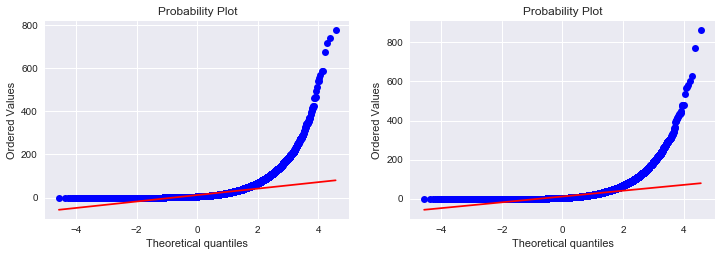

In [16]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(n_clicks_exp, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(n_clicks_control, dist="norm", plot=pylab)[1][2]
pylab.show()

Критерий Шапиро-Уилка:

 $H_0\colon$ n_clicks распредлены нормально
 
 $H_1\colon$ не нормально.

In [17]:
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(n_clicks_exp))
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(n_clicks_control))

Shapiro-Wilk normality test, W-statistic: 0.545878, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.537250, p-value: 0.000000


C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ВЫВОД:   
клики распределены не нормально, критерий Стьюдента не применим

## 4. t-критерий Стьюдента имеет множество достоинств, и потому его достаточно часто применяют в AB экспериментах. Иногда его применение может быть необоснованно из-за сильной скошенности распределения данных.

1) Получите из данных n_boot_samples псевдовыборок.

In [18]:
np.random.seed(0)
n_boot_samples = 500

control_bootstrap_samples = get_bootstrap_samples(n_clicks_control, 
                                                  n_boot_samples) # Получите из данных n_boot_samples псевдовыборок

2) По каждой из этих выборок посчитайте среднее и сумму квадратов отклонения от выборочного среднего (control_boot_chi_squared)

In [19]:
means = control_bootstrap_samples.mean(axis=1) # посчитайте среднее
control_boot_chi_squared = control_bootstrap_samples.std(axis=1) # посчитайте сумму квадратов отклонения от выборочного среднего

3) Для получившегося вектора средних значений из n_boot_samples постройте q-q plot с помощью scipy.stats.probplot для нормального распределения

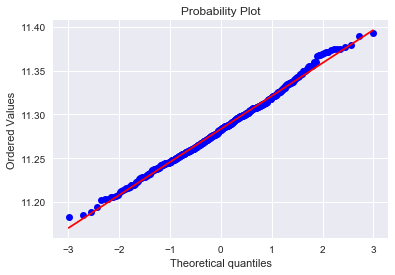

In [20]:
R_mean = scipy.stats.probplot(means, dist="norm", plot=plt)[1][2]

In [21]:
R_mean**2

0.99595377420820397

4) Для получившегося вектора сумм квадратов отклонения от выборочного среднего постройте qq-plot с помощью scipy.stats.probplot для хи-квадрат распределения с помощью команды

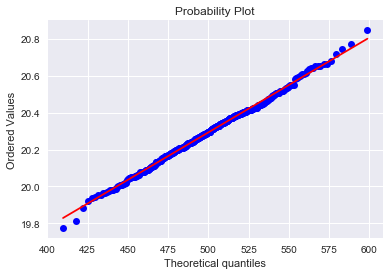

In [23]:
n = len(control_boot_chi_squared)
R_std = scipy.stats.probplot(control_boot_chi_squared, dist="chi2", sparams=(n-1), plot=plt)[1][2]

In [24]:
R_std**2

0.99728203019688166

((array([ 409.75447609,  417.6076492 ,  422.06789456,  425.24996033,
          427.75458277,  429.83540071,  431.6244473 ,  433.19958802,
          434.61075771,  435.89197548,  437.06750372,  438.15527962,
          439.16895419,  440.11916758,  441.0143809 ,  441.86143812,
          442.66595697,  443.43260794,  444.16531782,  444.86742108,
          445.54177438,  446.19084464,  446.81677748,  447.42145127,
          448.00652022,  448.57344901,  449.12354099,  449.6579613 ,
          450.17775596,  450.68386771,  451.17714938,  451.65837504,
          452.12824958,  452.58741674,  453.03646615,  453.47593922,
          453.90633437,  454.32811152,  454.74169597,  455.14748186,
          455.54583518,  455.93709642,  456.3215829 ,  456.69959087,
          457.07139736,  457.43726183,  457.79742761,  458.1521233 ,
          458.50156388,  458.84595184,  459.1854781 ,  459.52032292,
          459.85065667,  460.17664058,  460.49842735,  460.81616179,
          461.12998133,  461.44001

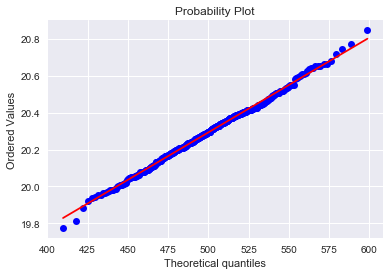

In [25]:
scipy.stats.probplot(control_boot_chi_squared, dist="chi2", sparams=(n-1), plot=plt)

In [26]:
help(stats.probplot)

Help on function probplot in module scipy.stats.morestats:

probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)
    Calculate quantiles for a probability plot, and optionally show the plot.
    
    Generates a probability plot of sample data against the quantiles of a
    specified theoretical distribution (the normal distribution by default).
    `probplot` optionally calculates a best-fit line for the data and plots the
    results using Matplotlib or a given plot function.
    
    Parameters
    ----------
    x : array_like
        Sample/response data from which `probplot` creates the plot.
    sparams : tuple, optional
        Distribution-specific shape parameters (shape parameters plus location
        and scale).
    dist : str or stats.distributions instance, optional
        Distribution or distribution function name. The default is 'norm' for a
        normal probability plot.  Objects that look enough like a
        stats.distributions instance (i.e. 

## 5. Одним из возможных аналогов t-критерия, которым можно воспрользоваться, является тест Манна-Уитни. 
На достаточно обширном классе распределений он является асимптотически более эффективным, чем t-критерий, и при этом не требует параметрических предположений о характере распределения.

Разделите выборку на две части, соответствующие control и exp группам. Преобразуйте данные к виду, чтобы каждому пользователю соответствовало суммарное значение его кликов. 

In [35]:
%%time
n_clicks_userID_exp = data[data['slot'] == 'exp'].groupby(by='userID').sum()['n_clicks']
n_clicks_userID_control = data[data['slot'] == 'control'].groupby(by='userID').sum()['n_clicks']

Wall time: 346 ms


С помощью критерия Манна-Уитни проверьте гипотезу о равенстве средних. Что можно сказать о получившемся значении достигаемого уровня значимости ?

### Ранговый критерий Манна-Уитни
$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [55]:
stats.mannwhitneyu(n_clicks_userID_exp, n_clicks_userID_control)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

## 6. Проверьте, для какого из браузеров наиболее сильно выражено отличие между количеством кликов в контрольной и экспериментальной группах.

Пройдемся по срезам. Посчитаем pvalue для критерия Манна-Уитни между control и exp группами

In [62]:
mannwhitneyu = {}
for browser in data['browser'].unique():
    n_clicks_browser_exp = data[data['slot'] == 'exp'][data['browser'] == browser]['n_clicks'].values
    n_clicks_browser_control = data[data['slot'] == 'control'][data['browser'] == browser]['n_clicks'].values
    pvalue = stats.mannwhitneyu(n_clicks_browser_exp, n_clicks_browser_control).pvalue
    mannwhitneyu[browser] = pvalue

mannwhitneyu

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


{'Browser #14': 0.0,
 'Browser #17': 0.037400601430108017,
 'Browser #2': 0.027243860419724101,
 'Browser #20': 0.45366656388735377,
 'Browser #22': 0.25740551522100319,
 'Browser #4': 0.40760617658454984}

Сделайте поправку Холма-Бонферрони (= "метод Холма) на множественную проверку с $\alpha = 0.05$

In [79]:
multipletests(mannwhitneyu.values(),  alpha = 0.05, method = 'holm')

(array([False, False, False, False, False,  True], dtype=bool),
 array([ 0.1362193 ,  0.81521235,  0.77221655,  0.81521235,  0.14960241,  0.        ]),
 0.008512444610847103,
 0.008333333333333333)

Посчитаем незначимые отличия

In [94]:
# считаем через отрицание, поскольку в нулевом массиве проверяется, наоборот, значимые отличия
answer_6 = (~multipletests(mannwhitneyu.values(),  alpha = 0.05, method = 'holm')[0]).sum() 
answer_6

5

## 7. Для каждого браузера в каждой из двух групп (control и exp) посчитайте долю запросов, в которых пользователь не кликнул ни разу. Это можно сделать, поделив сумму значений n_nonclk_queries на сумму значений n_queries. Умножив это значение на 100, получим процент некликнутых запросов, который можно легче проинтерпретировать.

In [90]:
proportion = {}

for group in ['exp', 'control']:
    proportion[group] = {}
    for browser in data['browser'].unique():
        proportion[group][browser] = round(float(data[data['slot'] == group][data['browser'] == browser]['n_nonclk_queries']
                                                 .values.sum()) / \
                                            data[data['slot'] == group][data['browser'] == browser]['n_clicks']
                                            .values.sum() * 100)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [91]:
proportion

{'control': {'Browser #14': 78.0,
  'Browser #17': 28.0,
  'Browser #2': 46.0,
  'Browser #20': 35.0,
  'Browser #22': 36.0,
  'Browser #4': 47.0},
 'exp': {'Browser #14': 42.0,
  'Browser #17': 29.0,
  'Browser #2': 44.0,
  'Browser #20': 33.0,
  'Browser #22': 34.0,
  'Browser #4': 43.0}}

Для наглядности представим в виде разности долей (**delta**) некликнутых запросов в двух группах (exp и control) по каждому браузеру:

In [92]:
delta = {browser:proportion['exp'][browser] - proportion['control'][browser] for browser in data['browser'].unique()}
delta

{'Browser #14': -36.0,
 'Browser #17': 1.0,
 'Browser #2': -2.0,
 'Browser #20': -2.0,
 'Browser #22': -2.0,
 'Browser #4': -4.0}